In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

In [3]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [6]:
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 10000 #meter
params.dist_threshold_min = 1000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_exp_income = 75 #euro
params.d2d.ini_exp_wt = 10 #minutes
params.d2d.res_wage = 80 #euro
params.d2d.res_wage_sp = 1
params.d2d.exp_income_sp = 1
params.d2d.exp_utility_eps = 0
params.d2d.omega = 0.10 # degree of learning: 0<omega<1
params.d2d.kappa = 1
params.d2d.beta = 0.1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_fare = 0.8
params.d2d.B_time = 1
params.PT_fare = 1 ## euro
params.PT_speed  = 5 # m/s

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = 1.21 #euro/km
params.platforms.min_fare = 2 # euro
params.platforms.comm_rate = 0.25

params.nP = 200
params.nV = 10
params.nD = 1
params.simTime = 4

In [7]:
#sim = MaaSSim.simulators.simulate(params=params, logger_level=logging.WARNING)
#sim = MaaSSim.simulators.simulate(params=params, kpi_veh=d2d_kpi_veh, logger_level=logging.WARNING)
simpd = MaaSSim.simulators.simulate(params=params, f_driver_out=driver_opt_out,f_trav_out=traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh, kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

19-04-22 19:16:40-WARNING-Setting up 4h simulation at 2022-04-19 17:16:35 for 10 vehicles and 200 passengers in Amsterdam, Netherlands
19-04-22 19:16:49-WARNING-simulation time 2.8 s
19-04-22 19:16:49-WARNING-assertion tests for simulation results - passed


In [165]:
simpd2 = MaaSSim.simulators.simulate(params=params, f_driver_out=driver_opt_out,f_trav_out=traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh, kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

19-04-22 09:33:14-WARNING-Setting up 4h simulation at 2022-04-19 07:32:08 for 100 vehicles and 2000 passengers in Amsterdam, Netherlands
19-04-22 09:33:29-WARNING-simulation time 9.6 s
19-04-22 09:33:30-WARNING-assertion tests for simulation results - passed
19-04-22 09:33:45-WARNING-simulation time 9.0 s
19-04-22 09:33:46-WARNING-assertion tests for simulation results - passed
19-04-22 09:33:59-WARNING-simulation time 8.8 s
19-04-22 09:34:03-WARNING-assertion tests for simulation results - passed
19-04-22 09:34:17-WARNING-simulation time 8.1 s
19-04-22 09:34:18-WARNING-assertion tests for simulation results - passed
19-04-22 09:34:30-WARNING-simulation time 7.9 s
19-04-22 09:34:31-WARNING-assertion tests for simulation results - passed
19-04-22 09:34:43-WARNING-simulation time 6.6 s
19-04-22 09:34:44-WARNING-assertion tests for simulation results - passed
19-04-22 09:34:56-WARNING-simulation time 7.7 s
19-04-22 09:35:00-WARNING-assertion tests for simulation results - passed
19-04-22 

In [177]:
simd2 = MaaSSim.simulators.simulate(params=params, f_driver_out=driver_opt_out,
                                  kpi_veh=d2d_kpi_veh, logger_level=logging.WARNING)

19-04-22 11:01:24-WARNING-Setting up 4h simulation at 2022-04-19 09:00:40 for 100 vehicles and 2000 passengers in Amsterdam, Netherlands
19-04-22 11:02:23-WARNING-simulation time 53.9 s
19-04-22 11:02:25-WARNING-assertion tests for simulation results - passed
19-04-22 11:03:37-WARNING-simulation time 67.6 s
19-04-22 11:03:39-WARNING-assertion tests for simulation results - passed
19-04-22 11:05:01-WARNING-simulation time 72.3 s
19-04-22 11:05:02-WARNING-assertion tests for simulation results - passed
19-04-22 11:06:17-WARNING-simulation time 68.0 s
19-04-22 11:06:18-WARNING-assertion tests for simulation results - passed
19-04-22 11:07:30-WARNING-simulation time 65.3 s
19-04-22 11:07:31-WARNING-assertion tests for simulation results - passed
19-04-22 11:08:37-WARNING-simulation time 58.9 s
19-04-22 11:08:41-WARNING-assertion tests for simulation results - passed
19-04-22 11:09:36-WARNING-simulation time 50.5 s
19-04-22 11:09:37-WARNING-assertion tests for simulation results - passed
19

In [174]:
simp2 = MaaSSim.simulators.simulate(params=params,f_trav_out=traveller_opt_out
                                   ,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

19-04-22 10:09:59-WARNING-Setting up 4h simulation at 2022-04-19 08:09:19 for 100 vehicles and 2000 passengers in Amsterdam, Netherlands
19-04-22 10:10:16-WARNING-simulation time 8.4 s
19-04-22 10:10:17-WARNING-assertion tests for simulation results - passed
19-04-22 10:10:33-WARNING-simulation time 10.6 s
19-04-22 10:10:34-WARNING-assertion tests for simulation results - passed
19-04-22 10:10:49-WARNING-simulation time 10.5 s
19-04-22 10:10:50-WARNING-assertion tests for simulation results - passed
19-04-22 10:11:08-WARNING-simulation time 12.3 s
19-04-22 10:11:09-WARNING-assertion tests for simulation results - passed
19-04-22 10:11:30-WARNING-simulation time 13.0 s
19-04-22 10:11:31-WARNING-assertion tests for simulation results - passed
19-04-22 10:11:49-WARNING-simulation time 12.2 s
19-04-22 10:11:50-WARNING-assertion tests for simulation results - passed
19-04-22 10:12:08-WARNING-simulation time 12.7 s
19-04-22 10:12:09-WARNING-assertion tests for simulation results - passed
19-

(-100.0, 2500.0)

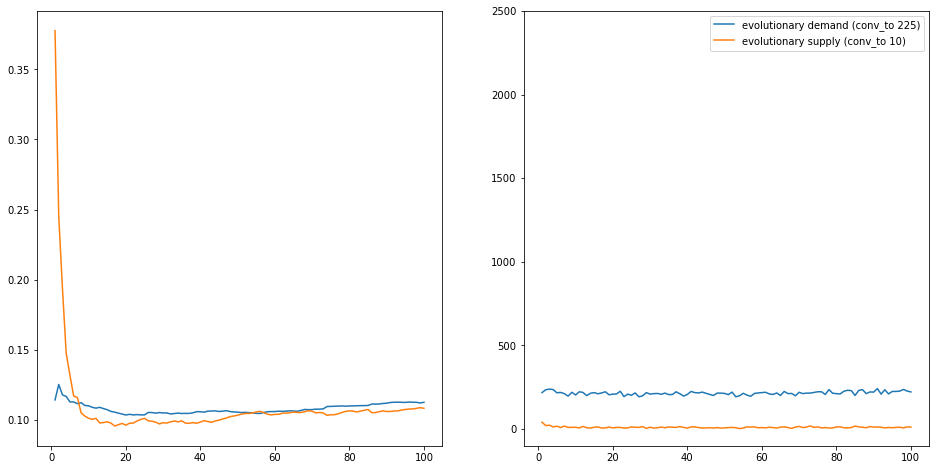

In [180]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
sim = simpd2

yp = []
for i in range(0,params.nD):
    yp.append(mean(sim.traveller_p[i*2000:(i+1)*2000]))
sns.lineplot(x=[i for i in range(1,len(yp)+1)], y=yp, ax = ax[0])

yd = []
for i in range(0,params.nD):
    yd.append(mean(sim.driver_p[i*100:(i+1)*100]))
sns.lineplot(x=[i for i in range(1,len(yd)+1)], y=yd, ax = ax[0])

lyp = []
lyd = []
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0))
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0))
    
lx = [i for i in range(1,len(lyp)+1)]
sns.lineplot(x=lx, y=lyp, label = 'evolutionary demand (conv_to {})'.format(mean(lyp[90:100])), ax=ax[1])#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'evolutionary supply (conv_to {})'.format(mean(lyd[90:100])), ax=ax[1])#, marker='o')
ax[1].set_ylim([-100,2500])

In [170]:
simpd2.res[0].veh_exp['OUT'].value_counts()

True     59
False    41
Name: OUT, dtype: int64

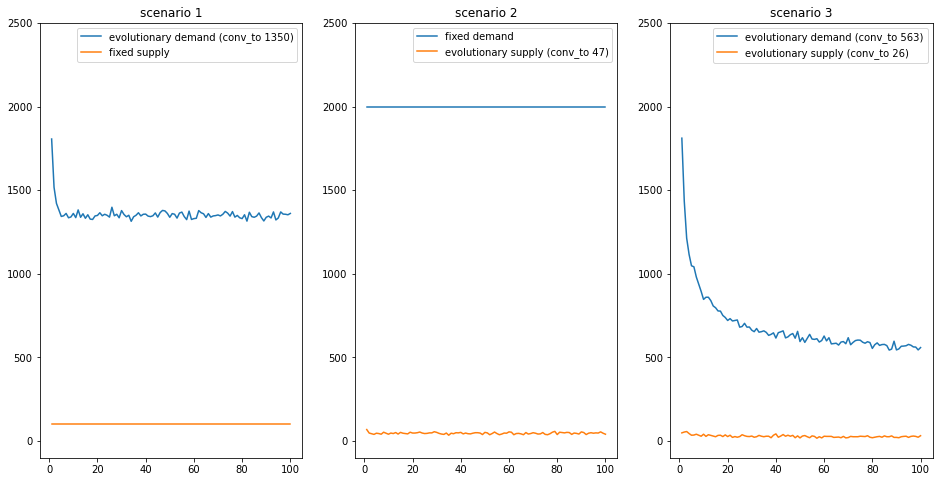

In [152]:
from statistics import mean
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

lyp = []
lyd = []
sim = simp
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0))
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0))
    
lx = [i for i in range(1,len(lyp)+1)]
sns.lineplot(x=lx, y=lyp, label = 'evolutionary demand (conv_to {})'.format(mean(lyp[90:100])), ax=ax[0])#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'fixed supply', ax=ax[0])#, marker='o')
ax[0].set_title('scenario 1')
ax[0].set_ylim([-100,2500])
y1 = lyd

lyp = []
lyd = []
sim = simd
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0))
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0))
    
lx = [i for i in range(1,len(lyp)+1)]
sns.lineplot(x=lx, y=lyp, label = 'fixed demand', ax=ax[1])#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'evolutionary supply (conv_to {})'.format(mean(lyd[90:100])), ax=ax[1])#, marker='o')
ax[1].set_title('scenario 2')
ax[1].set_ylim([-100,2500])
y2 = lyd

lyp = []
lyd = []
sim = simpd
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0))
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0))
    
lx = [i for i in range(1,len(lyp)+1)]
sns.lineplot(x=lx, y=lyp, label = 'evolutionary demand (conv_to {})'.format(mean(lyp[90:100])), ax=ax[2])#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'evolutionary supply (conv_to {})'.format(mean(lyd[90:100])), ax=ax[2])#, marker='o')
ax[2].set_title('scenario 3')
ax[2].set_ylim([-100,2500])
y3 = lyd

<AxesSubplot:>

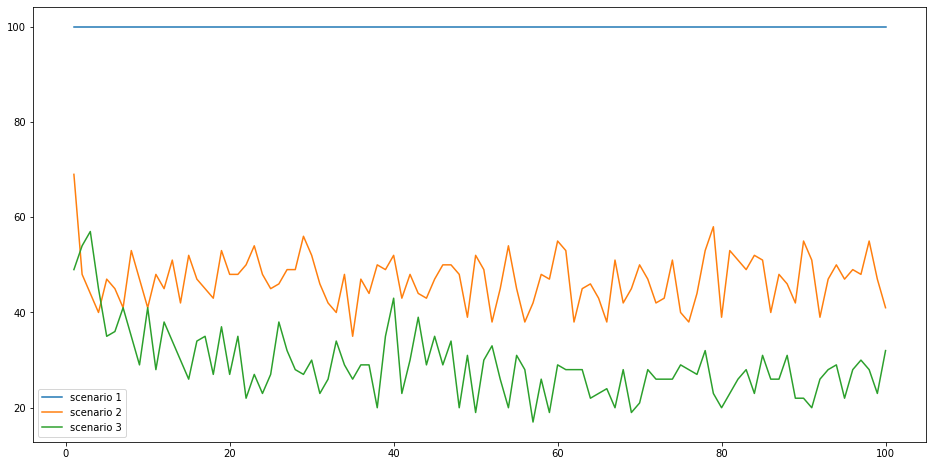

In [153]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(x=lx, y=y1, label='scenario 1')
sns.lineplot(x=lx, y=y2, label='scenario 2')
sns.lineplot(x=lx, y=y3, label='scenario 3')

<AxesSubplot:>

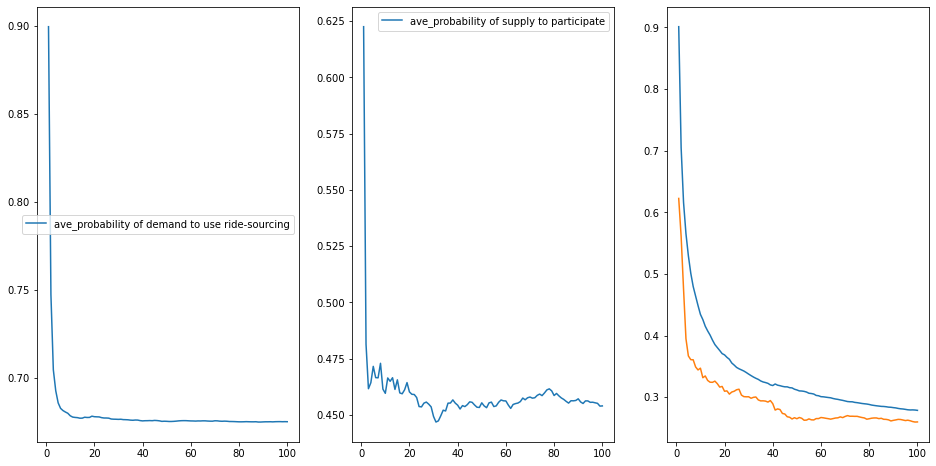

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))


sns.lineplot(x=[i for i in range(1,len(y1p)+1)], y=y1p, ax = ax[0], label='ave_probability of demand to use ride-sourcing')

sns.lineplot(x=[i for i in range(1,len(y2d)+1)], y=y2d, ax = ax[1],  label='ave_probability of supply to participate')

sns.lineplot(x=[i for i in range(1,len(y3p)+1)], y=y3p, ax = ax[2])
sns.lineplot(x=[i for i in range(1,len(y3d)+1)], y=y3d, ax = ax[2])


#ax.set_ylim([0,700])

In [161]:
y = []
for i in range(0,params.nD):
    y3p.append(mean(simpd.traveller_p[i*2000:(i+1)*2000]))

In [162]:
len(y3p)

100

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

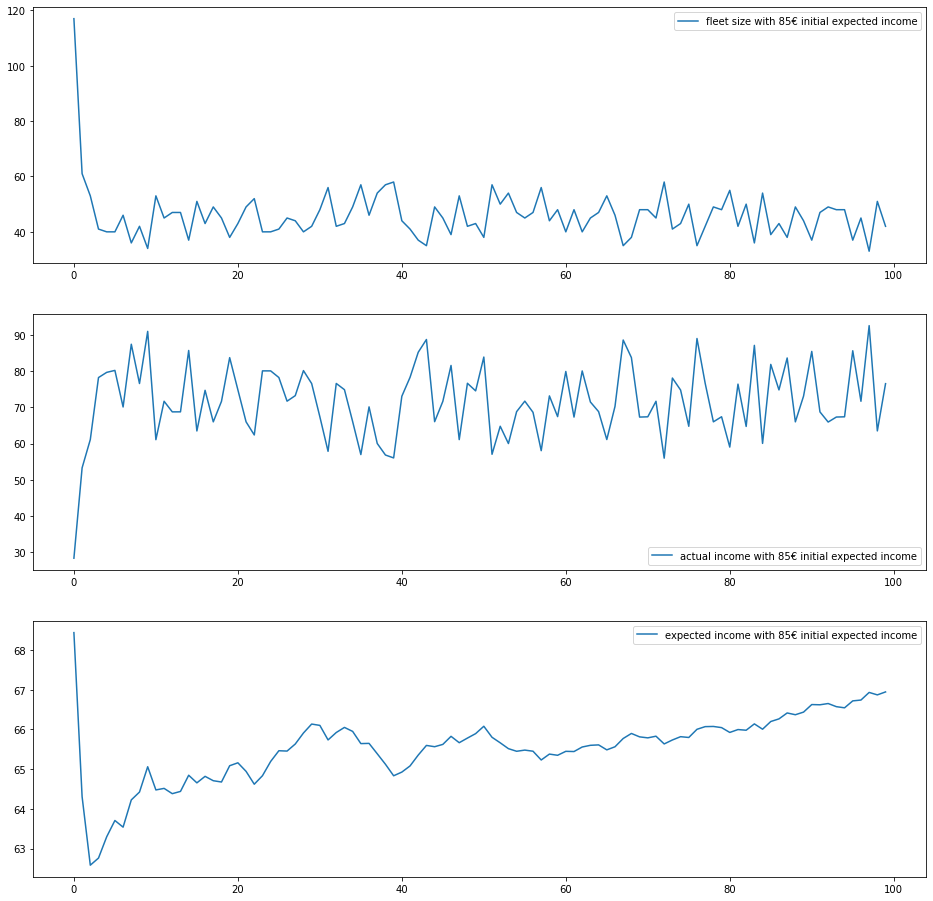

In [20]:
sim_list = []
sim_list.append(simd)
plot(sim_list)

In [89]:
df = pd.read_csv ('Amsterdam_requests.csv')

In [90]:
df

,Unnamed: 0,origin,destination,treq,tarr,ttrav,origin_x,origin_y,destination_x,destination_y,success,n_itineraries,duration,walkDistance,transfers,transitTime,waitingTime,modes
0,43078,46430975,46442305,2020-10-27 17:42:00,1900-01-01 17:47:00,0 days 00:05:00,4.817485,52.380884,4.820010,52.383424,True,2.0,359.0,437.272639,0.0,0.0,0.0,"[['WALK', 359, 437]]"
1,43085,46427503,46560239,2020-10-27 17:26:00,1900-01-01 18:01:00,0 days 00:35:00,4.834819,52.380153,4.913162,52.418185,True,3.0,2971.0,2302.549714,0.0,1109.0,2.0,"[['WALK', 992, 1199], ['BUS', 1109, 6503], ['W..."
2,43087,1715224324,46427992,2020-10-27 17:35:00,1900-01-01 17:40:00,0 days 00:05:00,4.820647,52.373804,4.828323,52.380275,True,3.0,690.0,473.136173,0.0,300.0,2.0,"[['WALK', 261, 317], ['TRAM', 300, 1458], ['WA..."
3,43099,3307343586,46176460,2020-10-27 17:58:00,1900-01-01 18:22:00,0 days 00:24:00,4.860901,52.350759,4.867612,52.324314,True,3.0,1391.0,782.054684,1.0,680.0,71.0,"[['WALK', 313, 376], ['BUS', 398, 1983], ['WAL..."
4,43105,46306915,46445707,2020-10-27 17:46:00,1900-01-01 18:01:00,0 days 00:15:00,4.820379,52.353578,4.825973,52.384198,True,3.0,1868.0,1162.185677,1.0,866.0,57.0,"[['WALK', 478, 589], ['BUS', 600, 3619], ['WAL..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24582,172035,46290934,46325757,2020-10-27 17:16:00,1900-01-01 17:21:00,0 days 00:05:00,4.885942,52.349949,4.892843,52.357911,True,3.0,824.0,814.724481,0.0,158.0,2.0,"[['WALK', 474, 585], ['TRAM', 158, 523], ['WAL..."
24583,172036,46290160,5805314261,2020-10-27 17:46:00,1900-01-01 17:51:00,0 days 00:05:00,4.886789,52.349779,4.890347,52.354966,True,1.0,605.0,762.287421,0.0,0.0,0.0,"[['WALK', 605, 762]]"
24584,172042,46208353,46287776,2020-10-27 17:46:00,1900-01-01 18:01:00,0 days 00:15:00,4.883210,52.332110,4.887482,52.349142,True,3.0,1637.0,1782.455714,0.0,216.0,2.0,"[['WALK', 397, 507], ['BUS', 216, 1027], ['WAL..."
24585,172050,2774989829,3295383145,2020-10-27 17:45:00,1900-01-01 18:01:00,0 days 00:16:00,4.878460,52.378470,4.889175,52.352487,True,3.0,1258.0,384.412917,0.0,942.0,2.0,"[['WALK', 216, 265], ['TRAM', 942, 3659], ['WA..."


In [101]:
sim = MaaSSim.simulators.simulate(params=params, logger_level=logging.WARNING)

15-04-22 15:54:12-WARNING-Setting up 0.5h simulation at 2022-04-15 15:42:25 for 10 vehicles and 10 passengers in Delft, Netherlands
veh queue---------- [1]
req queue---------- [0]
veh queue---------- [2, 3, 4, 5, 6, 7, 8, 9, 10]
req queue---------- [1]
veh queue---------- [2, 3, 4, 5, 6, 7, 8, 9]
req queue---------- [2]
veh queue---------- [2, 4, 5, 6, 7, 8, 9, 1, 10, 3]
req queue---------- [3]
veh queue---------- [2, 4, 5, 6, 7, 8, 9, 1, 3]
req queue---------- [4]
veh queue---------- [2, 4, 5, 6, 7, 8, 9, 3]
req queue---------- [5]
veh queue---------- [2, 4, 5, 6, 7, 8, 9]
req queue---------- [6]
veh queue---------- [2, 4, 6, 7, 8, 9, 10]
req queue---------- [7]
veh queue---------- [2, 4, 6, 8, 9, 10]
req queue---------- [8]
veh queue---------- [2, 4, 6, 8, 9]
req queue---------- [9]
15-04-22 15:54:12-WARNING-simulation time 0.2 s
15-04-22 15:54:12-WARNING-assertion tests for simulation results - passed


In [104]:
sim.requests

,pax_id,origin,destination,treq,tdep,ttrav,tarr,tdrop,shareable,schedule_id,dist,ride_id,position,sim_schedule
id,,,,,,,,,,,,,,
1,0,44852049,44818486,2022-04-15 15:42:25,NaN,0 days 00:03:01,2022-04-15 15:45:26,NaN,False,NaN,1812,0,0,node time req_id od 0 NaN...
2,1,44899985,1413911023,2022-04-15 15:45:58,NaN,0 days 00:04:27,2022-04-15 15:50:25,NaN,False,NaN,2678,1,0,node time req_id od 0 ...
3,2,1608998310,1552650969,2022-04-15 15:48:47,NaN,0 days 00:04:06,2022-04-15 15:52:53,NaN,False,NaN,2466,2,0,node time req_id od 0 ...
4,3,44864083,44824645,2022-04-15 15:57:51,NaN,0 days 00:05:50,2022-04-15 16:03:41,NaN,False,NaN,3501,3,0,node time req_id od 0 NaN...
5,4,1435362416,44904065,2022-04-15 16:00:25,NaN,0 days 00:04:56,2022-04-15 16:05:21,NaN,False,NaN,2965,4,0,node time req_id od 0 ...
6,5,1413910874,5124546103,2022-04-15 16:05:09,NaN,0 days 00:02:29,2022-04-15 16:07:38,NaN,False,NaN,1496,5,0,node time req_id od 0 ...
7,6,1413910863,44839193,2022-04-15 16:05:35,NaN,0 days 00:02:46,2022-04-15 16:08:21,NaN,False,NaN,1661,6,0,node time req_id od 0 ...
8,7,1558185442,1566353769,2022-04-15 16:07:56,NaN,0 days 00:04:13,2022-04-15 16:12:09,NaN,False,NaN,2534,7,0,node time req_id od 0 ...
9,8,1435362515,1570982849,2022-04-15 16:07:58,NaN,0 days 00:08:56,2022-04-15 16:16:54,NaN,False,NaN,5367,8,0,node time req_id od 0 ...


In [ ]:
# should we consider the non-working days in stationary tests?

In [ ]:
# some drivers actual income is negative (in some days), I need to decide what to do with them.

In [ ]:
# adf returns nan p-value when the variance is zero.

In [ ]:
-----------------------------------------------------------------------------------------

In [16]:
# ADF test
#  null hypothesis is that the series is non-stationary

"""
The more negative ADF Statistic is, the stronger the rejection of the null hypothesis (Non-Stationary)
"""
def ADF_test(X):
    print('------adf test------')
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

In [934]:
# KPSS test
# null hypothesis is that the series is stationary
# https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/

from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw): 
    print('-----kpss test------')
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    # print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    # print(f'num lags: {n_lags}')
    # print('Critial Values:')
    # for key, value in critical_values.items():
    #     print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [462]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

Text(0.5, 1.0, 'Stationary AR(1) Process')

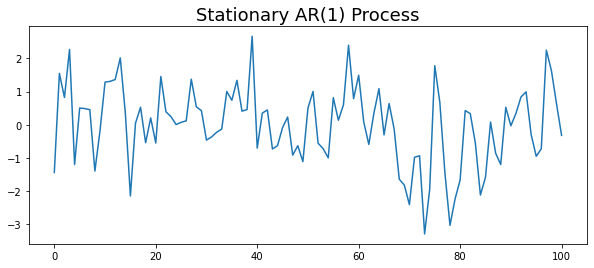

In [485]:
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

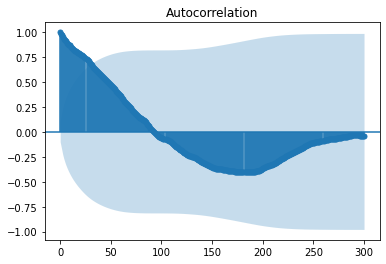

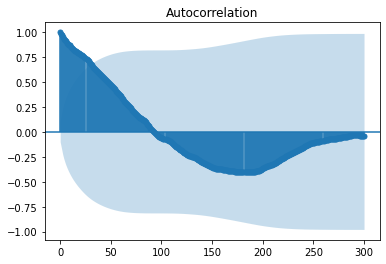

In [635]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ly, lags=300)

In [16]:
def plot(sim_list):
    fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(16,16))
    for sim in sim_list:
        ly = []
        for run_id in range(0,len(sim.res)):
            ly.append(sim.res[run_id].veh_exp.OUT.value_counts().get(False, 0))
        lx = [i for i in range(0,len(ly),1)]
        sns.lineplot(x=lx, y=ly, ax= ax[0], label='fleet size with {}€ initial expected income'.format(sim.params.d2d.ini_exp_income))#, marker='o')

        ly = []
        for run_id in range(0,len(sim.res)):
            ly.append(sim.res[run_id].veh_exp.ACTUAL_INC.sum()/sim.res[run_id].veh_exp.mu.sum())
        lx = [i for i in range(0,len(ly),1)]
        sns.lineplot(x=lx, y=ly, ax= ax[1], label='actual income with {}€ initial expected income'.format(sim.params.d2d.ini_exp_income))#, marker='o')

        ly = []
        for run_id in range(0,len(sim.res)):
            ly.append(sim.res[run_id].veh_exp.EXPECTED_INC.mean())
        lx = [i for i in range(0,len(ly),1)]
        sns.lineplot(x=lx, y=ly, ax= ax[2], label='expected income with {}€ initial expected income'.format(sim.params.d2d.ini_exp_income))#, marker='o')
    return ax

In [ ]:
Case 1: Both tests conclude that the given series is stationary – The series is stationary
Case 2: Both tests conclude that the given series is non-stationary – The series is non-stationary
Case 3: ADF concludes non-stationary and KPSS concludes stationary – The series is trend stationary. To make the series strictly stationary, the trend needs to be removed in this case. Then the detrended series is checked for stationarity.
Case 4: ADF concludes stationary and KPSS concludes non-stationary – The series is difference stationary. Differencing is to be used to make series stationary. Then the differenced series is checked for stationarity.

Trend stationary: The mean trend is deterministic. Once the trend is estimated and removed from the data, the residual series is a stationary stochastic process.

Difference stationary: The mean trend is stochastic. Differencing the series D times yields a stationary stochastic process.

Time series with a deterministic trend always revert to the trend in the long run (the effects of shocks are eventually eliminated). Forecast intervals have constant width.
Time series with a stochastic trend never recover from shocks to the system (the effects of shocks are permanent). Forecast intervals grow over time.

In [ ]:
# revenue - operating cost = profit

In [ ]:
can we define the scenarios as following ?!:
1- homogeneous and deterministic
2- heterogeneous and deterministic
3- homogeneous and probabilistic
4- heterogeneous and probabilistic (this one is problematic)